In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
test=pd.read_csv('test_data.csv')
df =pd.read_csv('train_data.csv')
df.head(2)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [4]:
df.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [5]:
df.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [6]:
df.nunique()

Customer Id           7160
YearOfObservation        5
Insured_Period         401
Residential              2
Building_Painted         2
Building_Fenced          2
Garden                   2
Settlement               2
Building Dimension    2043
Building_Type            4
Date_of_Occupancy      134
NumberOfWindows         11
Geo_Code              1307
Claim                    2
dtype: int64

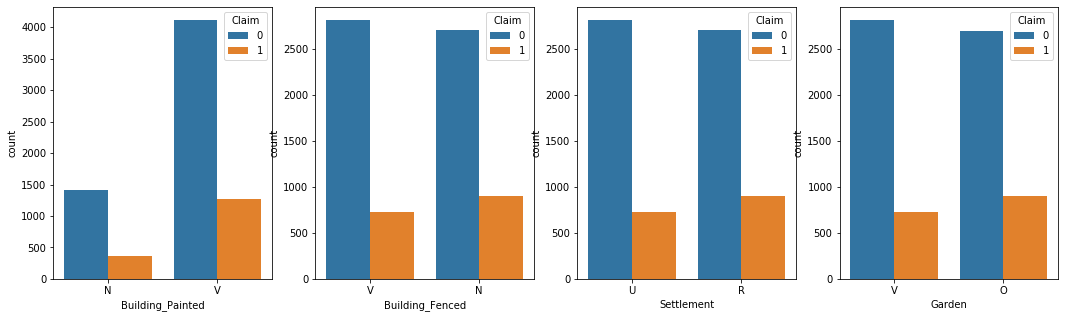

In [7]:
plt.figure(figsize=(18,5))
plt.subplot(1,4,1)
sns.countplot(df.Building_Painted,hue='Claim',data=df)
plt.subplot(1,4,2)
sns.countplot(df.Building_Fenced,hue='Claim',data=df)
plt.subplot(1,4,3)
sns.countplot(df.Settlement,hue='Claim',data=df)
plt.subplot(1,4,4)
sns.countplot(df.Garden,hue='Claim',data=df)

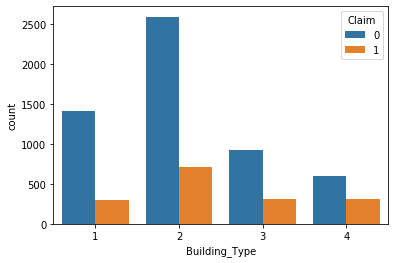

In [8]:
sns.countplot(df.Building_Type,hue='Claim',data=df)

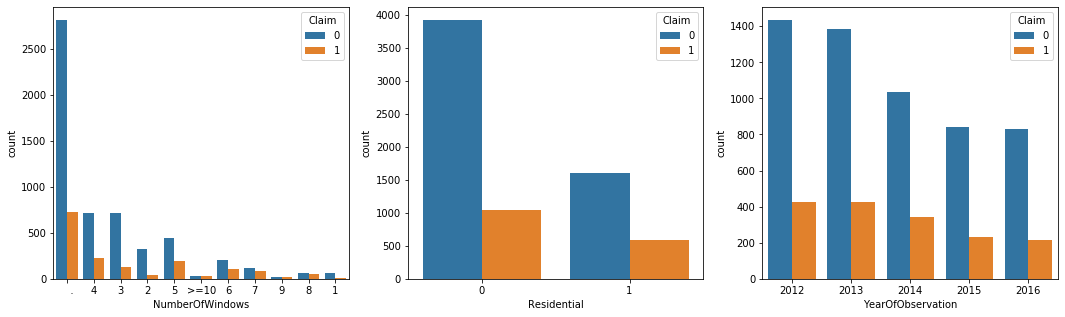

In [9]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.countplot(df.NumberOfWindows,hue='Claim',data=df)
plt.subplot(1,3,2)
sns.countplot(df.Residential,hue='Claim',data=df)
plt.subplot(1,3,3)
sns.countplot(df.YearOfObservation,hue='Claim',data=df)

In [10]:
NumberOfWindows=pd.get_dummies(df.NumberOfWindows,prefix='NumberOfWindows')
n_df=pd.concat([df,NumberOfWindows],axis=1)
NumberOfWindows=pd.get_dummies(test.NumberOfWindows,prefix='NumberOfWindows')
n_test=pd.concat([test,NumberOfWindows],axis=1)
n_df.drop(columns=['NumberOfWindows'],inplace=True)
n_test.drop(columns=['NumberOfWindows'],inplace=True)

In [11]:
cat=['Building_Painted','Building_Fenced','Settlement']
for i in cat:
    print(i)
    le=LabelEncoder()
    le.fit(n_df[i])
    n_df[i]=le.transform(n_df[i])

Building_Painted
Building_Fenced
Settlement


In [12]:
cat=['Building_Painted','Building_Fenced','Settlement']
for i in cat:
    print(i)
    le=LabelEncoder()
    le.fit(n_test[i])
    n_test[i]=le.transform(n_test[i])

Building_Painted
Building_Fenced
Settlement


In [13]:
n_df.drop(columns=['Garden'],inplace=True)
n_test.drop(columns=['Garden'],inplace=True)

In [14]:
n_df.Geo_Code.fillna(-1,inplace=True)
n_df['Geo_Code']=n_df['Geo_Code'].map(n_df['Geo_Code'].value_counts())

In [15]:
n_test.Geo_Code.fillna(-1,inplace=True)
n_test['Geo_Code']=n_test['Geo_Code'].map(n_test['Geo_Code'].value_counts())

In [16]:
n_df['Building Dimension'].fillna(n_df['Building Dimension'].median(),inplace=True)
n_test['Building Dimension'].fillna(n_test['Building Dimension'].median(),inplace=True)

In [17]:
n_df.Date_of_Occupancy.fillna(method='ffill',inplace=True)
n_test.Date_of_Occupancy.fillna(method='ffill',inplace=True)

In [18]:
n_df.to_csv('train.csv',index=False)
n_test.to_csv('test.csv',index=False)

In [22]:
n_df.corr().Claim

YearOfObservation      -0.016367
Insured_Period          0.088715
Residential             0.063509
Building_Painted        0.029857
Building_Fenced        -0.051657
Settlement             -0.052019
Building Dimension      0.295558
Building_Type           0.112168
Date_of_Occupancy       0.014223
Geo_Code                0.034749
Claim                   1.000000
NumberOfWindows_   .   -0.052171
NumberOfWindows_1      -0.033066
NumberOfWindows_2      -0.064988
NumberOfWindows_3      -0.063584
NumberOfWindows_4       0.007600
NumberOfWindows_5       0.053896
NumberOfWindows_6       0.057861
NumberOfWindows_7       0.082347
NumberOfWindows_8       0.075198
NumberOfWindows_9       0.055776
NumberOfWindows_>=10    0.068126
Name: Claim, dtype: float64

In [25]:
n_df.Insured_Period.round(1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7155    1.0
7156    1.0
7157    0.0
7158    1.0
7159    1.0
Name: Insured_Period, Length: 7160, dtype: float64

In [19]:
n_test.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy       0
Geo_Code                0
NumberOfWindows_   .    0
NumberOfWindows_1       0
NumberOfWindows_2       0
NumberOfWindows_3       0
NumberOfWindows_4       0
NumberOfWindows_5       0
NumberOfWindows_6       0
NumberOfWindows_7       0
NumberOfWindows_8       0
NumberOfWindows_9       0
NumberOfWindows_>=10    0
dtype: int64

In [20]:
n_test

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,...,NumberOfWindows_1,NumberOfWindows_2,NumberOfWindows_3,NumberOfWindows_4,NumberOfWindows_5,NumberOfWindows_6,NumberOfWindows_7,NumberOfWindows_8,NumberOfWindows_9,NumberOfWindows_>=10
0,H11920,2013,1.000000,0,1,0,0,300.0,1,1960.0,...,0,0,1,0,0,0,0,0,0,0
1,H11921,2016,0.997268,0,1,0,0,300.0,1,1960.0,...,0,0,1,0,0,0,0,0,0,0
2,H9805,2013,0.369863,0,1,1,1,790.0,1,1960.0,...,0,0,0,0,0,0,0,0,0,0
3,H7493,2014,1.000000,0,1,0,0,1405.0,1,2004.0,...,0,0,1,0,0,0,0,0,0,0
4,H7494,2016,1.000000,0,1,0,0,1405.0,1,2004.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,H11583,2015,1.000000,0,1,1,1,900.0,4,1900.0,...,0,0,0,0,0,0,0,0,0,0
3065,H11720,2012,1.000000,0,1,1,1,900.0,2,1948.0,...,0,0,0,0,0,0,0,0,0,0
3066,H11721,2012,1.000000,0,1,1,1,900.0,2,1993.0,...,0,0,0,0,0,0,0,0,0,0
3067,H12408,2013,1.000000,0,1,1,1,900.0,1,1800.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
n_df['month']=n_df.Insured_Period.round(1)*10+1
n_test['month']=n_test.Insured_Period.round(1)*10+1

In [36]:
n_df.to_csv('train_ad.csv',index=False)
n_test.to_csv('test_ad.csv',index=False)

In [42]:
n_df.corr().Claim

YearOfObservation      -0.016367
Insured_Period          0.088715
Residential             0.063509
Building_Painted        0.029857
Building_Fenced        -0.051657
Settlement             -0.052019
Building Dimension      0.295558
Building_Type           0.112168
Date_of_Occupancy       0.014223
Geo_Code                0.034749
Claim                   1.000000
NumberOfWindows_   .   -0.052171
NumberOfWindows_1      -0.033066
NumberOfWindows_2      -0.064988
NumberOfWindows_3      -0.063584
NumberOfWindows_4       0.007600
NumberOfWindows_5       0.053896
NumberOfWindows_6       0.057861
NumberOfWindows_7       0.082347
NumberOfWindows_8       0.075198
NumberOfWindows_9       0.055776
NumberOfWindows_>=10    0.068126
month                   0.088535
dif                    -0.014825
su                     -0.046890
Name: Claim, dtype: float64